# ASCII dithering
In this example, we are going to approximate a grayscale gradient
with an ASCII ramp such as ` .:-=+*#%@`.

In [1]:
using Images
using DitherPunk
using TestImages

When loading an image, we need to compensate for the aspect ratio of ASCII characters.

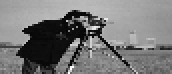

In [2]:
img = testimage("cameraman")
img = imresize(img, ratio=(1//14, 1//6))

We then define an ASCII ramp and a corresponding grayscale color scheme of matching length.

In [3]:
ascii_ramp = split(" .:-=+*#%@", "")
cs = Gray.(range(0, 1, length=10))

Dithering will return an `IndirectArray`:

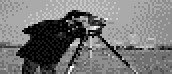

In [4]:
d = dither(img, FloydSteinberg(), cs)

Instead of showing `d` as an image, we can use its indices
to select the corresponding ASCII characters from the ramp.

In [5]:
mat = ascii_ramp[d.index]

37×86 Matrix{SubString{String}}:
 "+"  "*"  "+"  "*"  "+"  "*"  "*"  "*"  …  "+"  "*"  "+"  "+"  "*"  "+"  "*"
 "*"  "+"  "*"  "*"  "*"  "+"  "*"  "+"     "+"  "+"  "*"  "+"  "+"  "+"  "+"
 "+"  "*"  "+"  "+"  "*"  "+"  "*"  "*"     "*"  "*"  "+"  "*"  "+"  "*"  "+"
 "+"  "*"  "+"  "*"  "+"  "*"  "+"  "*"     "+"  "+"  "*"  "+"  "*"  "+"  "*"
 "+"  "*"  "+"  "*"  "*"  "*"  "+"  "*"     "*"  "+"  "+"  "*"  "+"  "*"  "+"
 "*"  "+"  "*"  "+"  "*"  "+"  "*"  "*"  …  "+"  "*"  "+"  "+"  "+"  "+"  "+"
 "+"  "*"  "*"  "+"  "*"  "*"  "*"  "*"     "+"  "+"  "+"  "*"  "+"  "*"  "+"
 "*"  "+"  "*"  "*"  "*"  "*"  "+"  "*"     "*"  "+"  "*"  "+"  "+"  "+"  "+"
 "*"  "*"  "*"  "+"  "*"  "*"  "*"  "*"     "+"  "+"  "+"  "+"  "+"  "+"  "+"
 "*"  "+"  "*"  "*"  "*"  "*"  "*"  "*"     "+"  "+"  "+"  "+"  "*"  "+"  "+"
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 "="  "+"  "+"  "="  "+"  "+"  "+"  "+"     "="  "="  "-"  "-"  "="  "="  "="
 "+"  "+"  "+"  "+"  "+"  "+"  "+

Pretty printing each row of this matrix will output the image:

In [6]:
for r in eachrow(mat)
    println(join(r))
end

+*+*+********************#**#**#**#*#*#*#*#*#*#*#***#**********************+*+*+*++*+*
*+***+*++**+*****************#***#***#**#*#**#***#*#**#**#***********+**++**+*+++*++++
+*++*+***+*************#**#***#**#*#**#*#*#*#*#*#****#********************+*+****+*+*+
+*+*+*+*+****+**************#**#**#*##*#*#*#*#*#*#*#****#**********+*+*+**+**++++*+*+*
+*+***+***+************#***#**#**#*#*#*##*#*#*#*#*#*##*#***#************+*+*+***++*+*+
*+*+*+**+***********#****#**#**#*##+. :=*##*#*#*#**#******************+***+*+*++*+++++
+**+**************#***#*#**#*#*#**   .     --#*#*#**#*#*#*#********+****+*+*+*++++*+*+
*+****+********#**#**#*#*#**#*#**:        .. .*#**#***#***************+**+*+*++*+*++++
***+**********#****#**#**#*#*#*#:   *  .#*==.:::-#*#****************+**+*++*++*+++++++
*+**************#*#**#*##*#***-.  . ==++***#::-*##:=%@*#**#*******+**+*+*+*++++++++*++
**+*********#******#*-.    ..    #==: :=+--*.-:..:-+:**************+**+*+*+*+*++*+++++
***************##*#.... . ... . . -+=.   +*

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*